# Lab 6
# Mariah Noelle Cornelio

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [4]:
# This solution fulfills the first requirement (multiple decks)

import random

# Creating my card class
class Card:
    def __init__(self, suit, value):
        self.suit=suit
        self.value=value

    def __str__(self):
        return f"{self.value} of {self.suit}"

# Making deck and making sure that I can use multiple standard decks
class Deck:
    def __init__(self, num_of_decks=6):
        self.num_of_decks=num_of_decks
        self.cards=[]
        self.make_deck()
        self.plastic_card_pos=0
        self.shuffle()
    
    # Took a part of this from my Quiz 2 solution
    def make_deck(self):
        suits=["Clubs", "Diamonds", "Hearts", "Spades"]
        values=[2, 3, 4, 5, 6, 7, 8, 9, 10, "Jack", "Queen", "King", "Ace"]
        self.cards=[Card(suit, value) for pair in range(self.num_of_decks) for suit in suits for value in values]

    # Going to use the random package here because it's easier for me and because it already
    # has the shuffle() method
    def shuffle(self):
        if self.cards:
            random.shuffle(self.cards)
            self.plastic_card_pos=random.randint(0, len(self.cards)-1)

    def draw_card(self):
        if len(self.cards)==0:
            return "There are no more cards in the deck. Please reset the deck."

        if len(self.cards)<=self.plastic_card_pos:
            # If plastic card is reached, remove it and then reshuffle the remaining cards
            self.cards=self.cards[:self.plastic_card_pos]
            self.shuffle()
            self.plastic_card_pos=-1
            return None
        return self.cards.pop(0) #.poop(0) simulates already drawing a card in a real card game

    def if_plastic_reached_then_shuffle(self):
        return len(self.cards)<=self.plastic_card_pos

    def reset_deck(self):
        self.make_deck()
        self.shuffle()

    def __str__(self):
        return f"This is your deck with {len(self.cards)} cards\n"

In [5]:
# Testing my solution - testing with 2 decks
test_deck=Deck(num_of_decks=2)
print(test_deck)

while test_deck.cards:
    card=test_deck.draw_card()
    if card is None: # None indicates the plastic card
        print("Plastic card reached! Reshuffling remaining cards...")
        continue
    print(card)

This is your deck with 104 cards

10 of Spades
9 of Diamonds
6 of Clubs
7 of Diamonds
Queen of Hearts
4 of Diamonds
Ace of Diamonds
Queen of Hearts
King of Diamonds
Queen of Clubs
4 of Clubs
Jack of Spades
8 of Clubs
Ace of Clubs
King of Spades
6 of Clubs
7 of Hearts
10 of Spades
5 of Hearts
7 of Hearts
5 of Diamonds
6 of Hearts
2 of Hearts
6 of Diamonds
3 of Hearts
Queen of Spades
3 of Clubs
King of Clubs
7 of Clubs
Jack of Diamonds
10 of Clubs
2 of Clubs
2 of Spades
4 of Spades
9 of Hearts
Ace of Spades
Plastic card reached! Reshuffling remaining cards...
6 of Spades
King of Hearts
Jack of Hearts
3 of Diamonds
9 of Spades
8 of Spades
8 of Clubs
10 of Diamonds
8 of Hearts
8 of Spades
4 of Spades
9 of Clubs
2 of Hearts
4 of Hearts
5 of Hearts
Jack of Hearts
Jack of Clubs
7 of Spades
10 of Clubs
9 of Diamonds
3 of Clubs
10 of Hearts
2 of Spades
Queen of Diamonds
6 of Spades
9 of Spades
8 of Diamonds
5 of Diamonds
5 of Spades
King of Hearts
8 of Diamonds
Ace of Hearts
Jack of Diamonds
7 

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [3]:
# UML Diagram Rough Draft Notes
------------------------------------
|            BlackjackGame         |
------------------------------------
| - decks: list of Deck            |
| - players: list of Player        |
| - dealer: Dealer                 |
------------------------------------
| + start_game(): void             |
| + deal_initial_hands(): void     |
| + play_round(): void             |
| + check_winner(): Player         |
| + display_winner(): void         |
| + get_average_winnings(): dict   |
| + reset_game(): void             |
------------------------------------

------------------------------------
|             Player               |
------------------------------------
| - hand: Hand                     |
| - chips: int                     |
| - bet: int                       |
| - strategy: Strategy             |
------------------------------------
| + place_bet(bet_amount): void    |
| + win_bet(): void                |
| + lose_bet(): void               |
| + tie_bet(): void                |
| + add_card_to_hand(card): void   |
| + clear_hand(): void             |
------------------------------------

------------------------------------
|             Dealer               |
------------------------------------
| - hand: Hand                     |
------------------------------------
| + play_turn(deck): void          |
------------------------------------

------------------------------------
|             Hand                 |
------------------------------------
| - cards: list of Card            |
------------------------------------
| + add_card(card): void           |
| + get_hand_value(): int          |
| + clear_hand(): void             |
------------------------------------

------------------------------------
|             Card                 |
------------------------------------
| - suit: str                      |
| - value: str                     |
------------------------------------
| + __init__(suit, value): void    |
| + __str__(): str                 |
------------------------------------

------------------------------------
|           Strategy               |
------------------------------------
| - name: str                      |
| - decision_threshold: int        |
------------------------------------
| + make_decision(hand_value): str|
------------------------------------


SyntaxError: invalid syntax (2000576149.py, line 2)

In [63]:
# Making the UML... 
# I am also going to use this section to create some more of my classes and the actual game that
# Fulfills the rest of the game requirements
# I make my remaining classes in this cell

# My card class from the previous section
class Card:
    def __init__(self, suit, value):
        self.suit=suit
        self.value=value
    def __str__(self):
        return f"{self.value} of {self.suit}"

# Making a player's hand
class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self, card):
        self.cards.append(card)

    def hand_value(self):
        total_val=0
        aces=0
        
        for card in self.cards:
            if card.value in ["Jack", "Queen", "King"]: # These are worth 10 points!
                total_val=total_val+10
            elif card.value=="Ace":
                aces=aces+1 # Aces can either be 11 or 1 points, depending which one is better for your score
                total_val=total_val+11
            else:
                total_val=total_val+int(card.value)
        
        # If you get an ace and the value goes over 21, change Ace value to 1:
        while aces>0 and total_val>21:
            total_val=total_val-10  
            aces=aces-1
        
        return total_val
    
    def clear_hand(self):
        self.cards=[]

# My player class - players have chips yay!
class Player:
    def __init__(self, player):
        self.player=player
        self.hand=Hand()
        self.chips=1000
        self.bet=0

    def place_bet(self, bet_amount):
        if bet_amount>self.chips:
            print("You don't have enough chips to bet!")
            return False
        self.bet=bet_amount
        self.chips=self.chips-bet_amount
        return True

    def bet_won(self):
        self.chips=self.chips+self.bet*2

    def bet_lost(self):
        self.chips=self.chips-self.bet
        self.bet=0

    def bet_tied(self):
        self.chips=self.chips+self.bet
        self.bet=0

    def make_decision(self):
        print(f"\nYour hand value, {self.player}: {self.hand.hand_value()}\n")
        decision=input(f"{self.player}, hit (h) or stand (s)? ").lower()
        while decision not in ["h", "s"]:
            print("Invalid input. Enter h to hit or s to stand.\n")
            decision=input(f"{self.player}, hit (h) or stand (s)? ").lower()
        return decision
    
    def add_card_to_hand(self, card):
        self.hand.add_card(card)

    def clear_hand(self):
        self.hand.clear_hand()


# My dealer class - this fulfills the dealer strategy requirement of hittin on 16
class Dealer:
    def __init__(self):
        self.hand=Hand()
        
    def add_card_to_hand(self, card):
        self.hand.add_card(card)
    
    def clear_hand(self):
        self.hand.clear_hand()

    def strategy_turn(self, deck):
        while self.hand.hand_value()<17:
            self.hand.add_card(deck.draw_card())


In [54]:
# Making the game mechanics in this cell

class BlackJack:
    def __init__(self, num_players):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_of_decks=6)

    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.hand.clear_hand()
        for player in self.players:
            player.hand.clear_hand()
            
    def continue_playing(self):
        for player in self.players:
            if player.chips==0:
                print(f"{player.player} is out of chips. Removing them from the game.")
                self.players.remove(player)
    
        if not self.players:
            print("All players are out of chips. Ending the game.")
            self.reset_game()
            return False
    
        while True:
            continue_game=input("Do you want to continue playing? (yes/no): ").lower()
            if continue_game=="yes":
                return True
            elif continue_game=="no":
                print("\nGAME OVER. THANKS 4 PLAYING (:!")
                self.reset_game()
                return False
            else:
                print("Invalid input. Please enter 'yes' or 'no'.")
                
    def start_game(self):
        for player in self.players:
            if player.chips==0:
                if len(self.players)>1:
                    print(f"{player.player} is out of chips. Removing from the game.")
                    self.players.remove(player)
                else:
                    print(f"{player.player} is out of chips. Game over!")
                    return
            # Place your bets
            bet_amount=int(input(f"{player.player}, place your bet ({player.chips} chips): "))
            while not player.place_bet(bet_amount):
                bet_amount=int(input("Invalid bet amount. Please try again: "))
            # Deal initial two cards to each player and then the dealer
            for card in range(2):
                player.add_card_to_hand(self.deck.draw_card())
                self.dealer.add_card_to_hand(self.deck.draw_card())
            # while True: - this code didn't work but keeping it just in case
                #self.play_round()
                #self.display_winner()
                #if not self.continue_playing():
                    #break
                    
    def play_round(self):
        # Dealer's turn
        while self.dealer.hand.hand_value()<17:
            self.dealer.add_card_to_hand(self.deck.draw_card())

        # Players' turns
        for player in self.players:
            decision=player.make_decision()
            while decision=="h":
                player.add_card_to_hand(self.deck.draw_card())
                if player.hand.hand_value()>21:
                    break
                decision=player.make_decision()

    def check_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                player.bet_lost()  # Subtracts chips because they lost
            elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                player.bet_won()  # Adds chips
            elif player_hand_value==dealer_hand_value:
                player.bet_tied()
            else:
                player.bet_lost()  # Subtract chips

    def determine_winner(self): # This narrates who wins
        dealer_hand_value=self.dealer.hand.hand_value()

        if dealer_hand_value>21:
            print("\nDealer busted! All remaining players win.")
            
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                print(f"\n{player.player} busted! Dealer wins.\n")
            elif dealer_hand_value>21 or player_hand_value > dealer_hand_value:
                print(f"\n{player.player} wins!\n")
            elif player_hand_value==dealer_hand_value:
                print(f"\n{player.player} ties with the dealer.\n")
            else:
                print(f"\n{player.player} loses. Dealer wins.\n")

    def display_winner(self): # End of round summaries
        print("ROUND SUMMARY")
        print("------------------\n")
        print("Dealer's hand:", ", ".join(str(card) for card in self.dealer.hand.cards))
        dealer_hand_value=self.dealer.hand.hand_value()
        print("Dealer's hand value:", dealer_hand_value)
        for player in self.players:
            print(f"{player.player}'s hand:", ", ".join(str(card) for card in player.hand.cards))
            player_hand_value=player.hand.hand_value()
            print(f"{player.player}'s hand value:", player_hand_value)
            # I implemented if the player runs out of chips, they are removed from the game
            # because you can't bet negative chips
            if player.chips==0:
                if len(self.players)>1:
                    print(f"{player.player} is out of chips. Removing from the game.")
                    self.players.remove(player)
                else:
                    print(f"{player.player} is out of chips. Game over!")
                    return
            else:
                if player_hand_value>21:
                    print(f"{player.player} busted!")
                elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                    print(f"{player.player} won!")
                    player.bet_won()  # Adding chips
                elif player_hand_value==dealer_hand_value:
                    print(f"{player.player} tied with the dealer!")
                    player.bet_tied() 
                else:
                    print(f"{player.player} lost!")
                # Prints current chip values
                print(f"{player.player}'s current chips: {player.chips}")

    # Resets bets for the next round
        for player in self.players:
            player.bet=0

In [10]:
# Testing my solution - with 1 player
print("B L A C K   J A C K")
print("\n--------------------------------------------------------------\n")
num_players=int(input("How many players will be playing? "))
game=BlackJack(num_players)
while True:
    print("\n--------------------------------------------------------------\n")
    game.reset_game()  # Reset hands at the beginning of each round
    game.start_game()
    game.play_round()
    game.check_winner
    game.determine_winner()
    game.display_winner()
    if not game.continue_playing():
        break

B L A C K   J A C K

--------------------------------------------------------------

How many players will be playing? 1

--------------------------------------------------------------

Player 1, place your bet (1000 chips): 300

Your hand value, Player 1: 15

Player 1, hit (h) or stand (s)? h

Player 1 busted! Dealer wins.

ROUND SUMMARY
------------------

Dealer's hand: 6 of Spades, 7 of Clubs, 8 of Clubs
Dealer's hand value: 21
Player 1's hand: 5 of Clubs, Queen of Hearts, 8 of Spades
Player 1's hand value: 23
Player 1 busted!
Player 1's current chips: 700
Do you want to continue playing? (yes/no): yes

--------------------------------------------------------------

Player 1, place your bet (700 chips): 100

Your hand value, Player 1: 18

Player 1, hit (h) or stand (s)? s

Player 1 loses. Dealer wins.

ROUND SUMMARY
------------------

Dealer's hand: 6 of Spades, 9 of Diamonds, 5 of Clubs
Dealer's hand value: 20
Player 1's hand: 8 of Spades, Queen of Hearts
Player 1's hand value: 1

In [11]:
# Testing my solution - with 2 players

print("B L A C K   J A C K")
print("\n--------------------------------------------------------------\n")
num_players = int(input("How many players will be playing? "))
game = BlackJack(num_players)
while True:
    print("\n--------------------------------------------------------------\n")
    game.reset_game()
    game.start_game()
    game.play_round()
    game.check_winner
    game.determine_winner()
    game.display_winner()
    if not game.continue_playing():
        break

B L A C K   J A C K

--------------------------------------------------------------

How many players will be playing? 2

--------------------------------------------------------------

Player 1, place your bet (1000 chips): 100
Player 2, place your bet (1000 chips): 400

Your hand value, Player 1: 13

Player 1, hit (h) or stand (s)? h

Your hand value, Player 1: 21

Player 1, hit (h) or stand (s)? s

Your hand value, Player 2: 20

Player 2, hit (h) or stand (s)? h

Dealer busted! All remaining players win.

Player 1 wins!


Player 2 busted! Dealer wins.

ROUND SUMMARY
------------------

Dealer's hand: 3 of Diamonds, 10 of Hearts, Jack of Diamonds, 10 of Clubs
Dealer's hand value: 33
Player 1's hand: 4 of Hearts, 9 of Diamonds, 8 of Spades
Player 1's hand value: 21
Player 1 won!
Player 1's current chips: 1100
Player 2's hand: King of Hearts, Jack of Clubs, 8 of Diamonds
Player 2's hand value: 28
Player 2 busted!
Player 2's current chips: 600
Do you want to continue playing? (yes/no): 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [69]:
# I kind of went ahead and already coded the logic but here is my skeleton anyways

class Card:
    def __init__(self, suit, value):
        self.suit=suit
        self.value=value
    
    def __str__(self):
        # Return string representation of the card

class Hand:
    def __init__(self):
        self.cards=[]

    def add_card(self, card):
        # Adds card to hand
    
    def hand_value(self):
        # Calculates and returns value of the hand
    
    def clear_hand(self):
        # Clears hand

class Player:
    def __init__(self, player):
        self.player=player
        self.hand=Hand()
        self.chips=1000
        self.bet=0

    def place_bet(self, bet_amount):
        # Places bet with specified amount
    
    def bet_won(self):
        # Adds chips when player wins
    
    def bet_lost(self):
        # Subtracts chips when the player loses
    
    def bet_tied(self):
        # Updates chips when the player ties
    
    def make_decision(self):
        # Make a decision - hit or stand
    
    def add_card_to_hand(self, card):
        # Adds a card to the player's hand
    
    def clear_hand(self):
        # Clear the player's hand

class Dealer:
    def __init__(self):
        self.hand=Hand()

    def add_card_to_hand(self, card):
        # Adds a card to the dealer's hand
    
    def clear_hand(self):
        # Clear the dealer's hand
    
    def dealer_strat(self, deck):
        # Implement the dealer's strategy during the game

class BlackJack:
    def __init__(self, num_players):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_of_decks=6)

    def reset_game(self):
        # Resets game for a new round
    
    def continue_playing(self):
        # Checks if the players want to continue playing
    
    def start_game(self):
        # Starts game
    
    def play_round(self):
        # Plays a round of the game
    
    def check_winner(self):
        # Checks the winner(s) of the round
    
    def determine_winner(self):
        # Determines and display the winner(s) of the round
    
    def display_winner(self):
        # Display the summary of the round and updates chips

IndentationError: expected an indented block after function definition on line 8 (4194181379.py, line 11)

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [ ]:
# I did this in the code above under number 2!!

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [ ]:
# I also did this in the code above under number 2!!!

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [64]:
# Defining New_Player class with this strategy

class New_Player(Player):
    def __init__(self, player):
        super().__init__(player)
        self.card_values = {"2": 1, "3": 1, "4": 1, "5": 1, "6": 1, "7": 0, "8": 0, "9": 0, "10": -1, "Jack": -1, "Queen": -1, "King": -1, "Ace": -1}
        self.count_threshold=-2  # If -2, then player will most likely stay

    def make_decision(self):
        print(f"\nYour hand value, {self.player}: {self.hand.hand_value()}\n")
        current_count=self.compute_count()
        print(f"Player, your current card value: {current_count}\n")
        if current_count<=self.count_threshold:
            choice="s"
            print(f"{self.player}, based on your card value, you should stay.")
        else:
            choice="h"
            print(f"{self.player}, based on your card value, you should hit.")
        return choice

    def compute_count(self):
        count=0
        for card in self.hand.cards:
            count+=self.card_values.get(card.value, 0)
        return count

In [65]:
# This cell is my whole code updated with the New_Player class 

# My classes from the previous section
class Card:
    def __init__(self, suit, value):
        self.suit=suit
        self.value=value
    def __str__(self):
        return f"{self.value} of {self.suit}"

class Hand:
    def __init__(self):
        self.cards=[]
    def add_card(self, card):
        self.cards.append(card)
    def hand_value(self):
        total_val=0
        aces=0
        for card in self.cards:
            if card.value in ["Jack", "Queen", "King"]:
                total_val=total_val+10
            elif card.value=="Ace":
                aces=aces+1
                total_val=total_val+11
            else:
                total_val=total_val+int(card.value)
        while aces>0 and total_val>21:
            total_val=total_val-10  
            aces=aces-1   
        return total_val  
    def clear_hand(self):
        self.cards=[]

class Player:
    def __init__(self, player):
        self.player=player
        self.hand=Hand()
        self.chips=1000
        self.bet=0
    def place_bet(self, bet_amount):
        if bet_amount>self.chips:
            print("You don't have enough chips to bet!")
            return False
        self.bet=bet_amount
        self.chips=self.chips-bet_amount
        return True
    def bet_won(self):
        self.chips=self.chips+self.bet*2
    def bet_lost(self):
        self.chips=self.chips-self.bet
        self.bet=0
    def bet_tied(self):
        self.chips=self.chips+self.bet
        self.bet=0
    def make_decision(self):
        print(f"\nYour hand value, {self.player}: {self.hand.hand_value()}\n")
        decision=input(f"{self.player}, hit (h) or stand (s)? ").lower()
        while decision not in ["h", "s"]:
            print("Invalid input. Enter h to hit or s to stand.\n")
            decision=input(f"{self.player}, hit (h) or stand (s)? ").lower()
        return decision
    def add_card_to_hand(self, card):
        self.hand.add_card(card)
    def clear_hand(self):
        self.hand.clear_hand()

class Dealer:
    def __init__(self):
        self.hand=Hand()
    def add_card_to_hand(self, card):
        self.hand.add_card(card)
    def clear_hand(self):
        self.hand.clear_hand()
    def strategy_turn(self, deck):
        while self.hand.hand_value()<17:
            self.hand.add_card(deck.draw_card())

# There are some new functions to adjust to the New_Player class implemented
class BlackJack:
    def __init__(self, num_players):
        # This makes it so that the new_player is the last to join - relevant to how my code works
        self.players=[New_Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_of_decks=6)

    def add_player(self, player):
        self.players.append(player)
    def set_dealer(self, dealer):
        self.dealer=dealer
    def set_deck(self, deck):
        self.deck=deck
    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.hand.clear_hand()
        for player in self.players:
            player.hand.clear_hand()
    def continue_playing(self):
        for player in self.players:
            if player.chips==0:
                print(f"{player.player} is out of chips. Removing them from the game.")
                self.players.remove(player)
        if not self.players:
            print("All players are out of chips. Ending the game.")
            self.reset_game()
            return False
        while True:
            continue_game = input("Do you want to continue playing? (yes/no): ").lower()
            if continue_game=="yes":
                return True
            elif continue_game=="no":
                print("\nGAME OVER. THANKS 4 PLAYING (:!")
                self.reset_game()
                return False
            else:
                print("Invalid input. Please enter 'yes' or 'no'.")   
    def start_game(self):
        for player in self.players:
            if player.chips == 0:
                if len(self.players) > 1:
                    print(f"{player.player} is out of chips. Removing from the game.")
                    self.players.remove(player)
                else:
                    print(f"{player.player} is out of chips. Game over!")
                    return
            bet_amount=int(input(f"{player.player}, place your bet ({player.chips} chips): "))
            while not player.place_bet(bet_amount):
                bet_amount=int(input("Invalid bet amount. Please try again: "))
            for card in range(2):
                player.add_card_to_hand(self.deck.draw_card())
                self.dealer.add_card_to_hand(self.deck.draw_card())                  
    def play_round(self):
        while self.dealer.hand.hand_value()<17:
            self.dealer.add_card_to_hand(self.deck.draw_card())
        for player in self.players:
            decision=player.make_decision()
            while decision=="h":
                player.add_card_to_hand(self.deck.draw_card())
                if player.hand.hand_value()>21:
                    break
                decision=player.make_decision()
    def check_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                player.bet_lost()
            elif dealer_hand_value>21 or player_hand_value > dealer_hand_value:
                player.bet_won()
            elif player_hand_value==dealer_hand_value:
                player.bet_tied()
            else:
                player.bet_lost()
    def determine_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        if dealer_hand_value>21:
            print("\nDealer busted! All remaining players win.")
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                print(f"\n{player.player} busted! Dealer wins.\n")
            elif dealer_hand_value>21 or player_hand_value > dealer_hand_value:
                print(f"\n{player.player} wins!\n")
            elif player_hand_value==dealer_hand_value:
                print(f"\n{player.player} ties with the dealer.\n")
            else:
                print(f"\n{player.player} loses. Dealer wins.\n")
    def display_winner(self):
        print("ROUND SUMMARY")
        print("------------------\n")
        print("Dealer's hand:", ", ".join(str(card) for card in self.dealer.hand.cards))
        dealer_hand_value=self.dealer.hand.hand_value()
        print("Dealer's hand value:", dealer_hand_value)
        for player in self.players:
            print(f"{player.player}'s hand:", ", ".join(str(card) for card in player.hand.cards))
            player_hand_value=player.hand.hand_value()
            print(f"{player.player}'s hand value:", player_hand_value)
            if player.chips==0:
                if len(self.players)>1:
                    print(f"{player.player} is out of chips. Removing from the game.")
                    self.players.remove(player)
                else:
                    print(f"{player.player} is out of chips. Game over!")
                    return
            else:
                if player_hand_value>21:
                    print(f"{player.player} busted!")
                elif dealer_hand_value>21 or player_hand_value > dealer_hand_value:
                    print(f"{player.player} won!")
                    player.bet_won()
                elif player_hand_value == dealer_hand_value:
                    print(f"{player.player} tied with the dealer!")
                    player.bet_tied()
                else:
                    print(f"{player.player} lost!")
                print(f"{player.player}'s current chips: {player.chips}")
        for player in self.players:
            player.bet = 0    

In [23]:
# Testing my solution - with the New_Player strategy 
# Note: the new point count system strategy only works for the new_player. Regular rules apply to other players
# Also note: this game loop automatically plays for the New_Player and gives advice depending
# On the card count value

print("B L A C K   J A C K")
print("\n--------------------------------------------------------------\n")
num_players=int(input("How many players will be playing? "))
game=BlackJack(num_players)

while True:
    print("\n--------------------------------------------------------------\n")
    game.reset_game()
    game.start_game()
    game.play_round()
    game.check_winner()
    game.determine_winner()
    game.display_winner()
    if not game.continue_playing():
        break
        
    # This example game shows that this strategy isn't all that good - in my opinion
    # Maybe it will be better if I set the threshold to stand if the value is -1 rather than -2

B L A C K   J A C K

--------------------------------------------------------------

How many players will be playing? 1

--------------------------------------------------------------

Player 1, place your bet (1000 chips): 100

Your hand value, Player 1: 19

Player, your current card value: -1

Player 1, based on your card value, you should hit.

Player 1 busted! Dealer wins.

ROUND SUMMARY
------------------

Dealer's hand: 7 of Hearts, 3 of Clubs, Jack of Spades
Dealer's hand value: 20
Player 1's hand: 9 of Hearts, Queen of Spades, 3 of Diamonds
Player 1's hand value: 22
Player 1 busted!
Player 1's current chips: 800
Do you want to continue playing? (yes/no): yes

--------------------------------------------------------------

Player 1, place your bet (800 chips): 100

Your hand value, Player 1: 12

Player, your current card value: -1

Player 1, based on your card value, you should hit.

Player 1 busted! Dealer wins.

ROUND SUMMARY
------------------

Dealer's hand: Queen of Diamon

#### 7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [66]:
# Some modifications of my previous code to make sure this question works
# I will annotate if there were any changes

class Deck:
    def __init__(self, num_of_decks=6):
        self.num_of_decks=num_of_decks
        self.cards=[]
        self.make_deck()
        self.plastic_card_pos=0
        self.shuffle()
    def make_deck(self):
        suits=["Clubs", "Diamonds", "Hearts", "Spades"]
        values=[2, 3, 4, 5, 6, 7, 8, 9, 10, "Jack", "Queen", "King", "Ace"]
        self.cards=[Card(suit, value) for pair in range(self.num_of_decks) for suit in suits for value in values]
    def shuffle(self):
        if self.cards:
            random.shuffle(self.cards)
            self.plastic_card_pos=random.randint(0, len(self.cards)-1)
    # Changes this up because my previoius code for this implemented the plastic_card_position
    # And this code won't work properly if there is a random plastic_card
    def draw_card(self):
        if len(self.cards)==0:
            return None
        return self.cards.pop(0)
    # I technically don't need this part of the code
    #def if_plastic_reached_then_shuffle(self):
        #return len(self.cards)<=self.plastic_card_pos

    def reset_deck(self):
        self.make_deck()
        self.shuffle()
    def __str__(self):
        return f"This is your deck with {len(self.cards)} cards\n"

# New_Player class from previoius code
class New_Player(Player):
    # New automatic code so I don't have to do it
    def make_decision_auto(self):
        if self.hand.hand_value()<17:
            return "h"  # Hit if hand value is less than 17
        else:
            return "s"  # Stay otherwise

class BlackJack:
    def __init__(self):
        self.players=[]
        self.dealer=None
        self.deck=None
    def add_player(self, player):
        self.players.append(player)
    def set_dealer(self, dealer):
        self.dealer = dealer
    def set_deck(self, deck):
        self.deck = deck
    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.hand.clear_hand()
        for player in self.players:
            player.hand.clear_hand()
    def start_game(self):
        # Since this is a loop of 50 rounds, I did not want to keep inputting my bet amount so
        # I made a fixed bet amount of 10 chips
        for player in self.players:
            player.place_bet(10)
            for card in range(2):
                player.add_card_to_hand(self.deck.draw_card())
                self.dealer.add_card_to_hand(self.deck.draw_card())
    def play_round(self):
        while self.dealer.hand.hand_value()<17:
            self.dealer.add_card_to_hand(self.deck.draw_card())

        for player in self.players:
            if isinstance(player, New_Player):  # Check if player is the New_Player
                print("\n--------------------------------------------------------------")
                print(f"Player 1 (New Player)'s turn:")
                decision=player.make_decision_auto()
                print(f"Decision: {decision}")
            else:
                print("\n--------------------------------------------------------------")
                print(f"{player.player}'s turn:")
                decision=player.make_decision()
                print(f"Decision: {decision}")

            while decision=="h":
                player.add_card_to_hand(self.deck.draw_card())
                if player.hand.hand_value()>21:
                    break
                if isinstance(player, New_Player):
                    decision = player.make_decision_auto()
                    print(f"Decision: {decision}")
                else:
                    decision = player.make_decision()
                    print(f"Decision: {decision}")
    def display_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                player.bet_lost()
            elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                player.bet_won()
            elif player_hand_value==dealer_hand_value:
                player.bet_tied()
            else:
                player.bet_lost()

In [67]:
# Testing my solution
game=BlackJack()

# Adding players
game.add_player(New_Player("Player 1"))  # From previous question
for i in range(3):
    game.add_player(Player(f"Player {i+2}"))  # Players 2-4 with dealer strategy

game.set_dealer(Dealer())
game.set_deck(Deck(num_of_decks=6))
initial_chips=1000
for player in game.players:
    player.chips=initial_chips

num_rounds=50
strategy_player_winnings=0
for round_num in range(1, num_rounds+1):
    print("\n--------------------------------------------------------------")
    print(f"Round {round_num}")
    game.reset_game()
    for player in game.players:
        player.place_bet(10)
    game.start_game()
    game.play_round()
    game.display_winner()

    strategy_player=game.players[0]
    strategy_player_winnings+=strategy_player.chips-initial_chips

    if strategy_player.chips<=0:
        print("Strategy player is out of chips. Terminating game...")
        break

    if round_num==num_rounds:
        print("50 rounds completed.")

# NOTE: winnings are in chips
print("Strategy player's total winnings after 50 rounds:", strategy_player_winnings)


--------------------------------------------------------------
Round 1

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 20

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 17

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 17

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 2

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: h
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 17

Player 2, hit (h) or stand (s)? s
Decision

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 11

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 12

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 13

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: h
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 12

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 12

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 16

Player 4, hit 

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 25

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: h
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 20

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 17

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 14

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 26

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2

Player 3, hit (h) or stand (s)? h
Decision: h

Your hand value, Player 3: 12

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 11

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 36

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: h

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 12

Player 2, hit (h) or stand (s)? sh
Invalid input. Enter h to hit or s to stand.

Player 2, hit (h) or stand (s)? h
Decision: h

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 16

Player 3, hit (h) or stand (s)? h
Decision: h

Your hand value, Player 3: 19

Player 3, hit (h) or stand (s)? h
Decision: h

Your hand value, Player 3: 21

Player 3, hit (h) or stand (s

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 10

Player 3, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 14

Player 4, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Round 47

--------------------------------------------------------------
Player 1 (New Player)'s turn:
Decision: h
Decision: h
Decision: s

--------------------------------------------------------------
Player 2's turn:

Your hand value, Player 2: 14

Player 2, hit (h) or stand (s)? s
Decision: s

--------------------------------------------------------------
Player 3's turn:

Your hand value, Player 3: 14

Player 3, hit (h) or stand (s)? h
Decision: h

--------------------------------------------------------------
Player 4's turn:

Your hand value, Player 4: 13

Pl

### 8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [32]:
import numpy as np
import matplotlib.pyplot as plt # To make a histogram

# If there are new additions, I will annotate them

class BlackJack:
    def __init__(self, num_players):
        self.players=[Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer=Dealer()
        self.deck=Deck(num_of_decks=6)
    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.hand.clear_hand()
        for player in self.players:
            player.hand.clear_hand()
    def start_game(self):
        for player in self.players:
            player.place_bet(10)
        for card in range(2):
            for player in self.players:
                player.add_card_to_hand(self.deck.draw_card())
            self.dealer.add_card_to_hand(self.deck.draw_card())
    def play_round(self):
        self.dealer.strategy_turn(self.deck)
    def display_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                player.bet_lost()
            elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                player.bet_won()
            elif player_hand_value==dealer_hand_value:
                player.bet_tied()
            else:
                player.bet_lost()
                
    # Game simulation for this question using last question's strategy
    def simulate_game(self, rounds=50):
        player_winnings=0
        for game_rounds in range(rounds):
            self.reset_game()
            self.start_game()
            self.play_round()
            self.display_winner()
            player_winnings+=self.players[0].chips

        return player_winnings

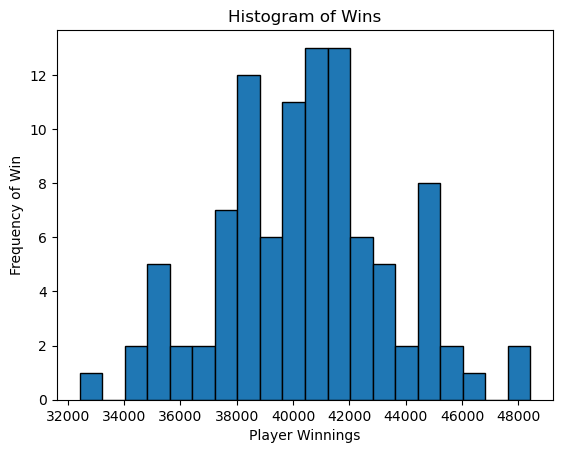

Average winnings per round: 8.10346
Probability of wins after 50 rounds: 1.0
Probability of losses after 50 rounds: 0.0


In [35]:
# Testing my solution

num_games=100
player_winnings=[]
for game_rounds in range(num_games):
    game=BlackJack(num_players=4)
    winnings=game.simulate_game()
    player_winnings.append(winnings)

# Histogram
plt.hist(player_winnings, bins=20, edgecolor="black")
plt.xlabel("Player Winnings")
plt.ylabel("Frequency of Win")
plt.title("Histogram of Wins")
plt.show()

# Stats
average_winnings_per_round=np.mean(player_winnings)/(num_games*50)
probability_winning=np.sum(np.array(player_winnings)>0)/num_games
probability_losing=np.sum(np.array(player_winnings)<0)/num_games
print(f"Average winnings per round: {average_winnings_per_round}")
print(f"Probability of wins after 50 rounds: {probability_winning}")
print(f"Probability of losses after 50 rounds: {probability_losing}")

# Everytime I run this code, the average stays around ~8
# The net win is always 1 and the net loss is always 0. I'm not sure the reason of this. It's
# Either the strategy is really good or I did something wrong

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

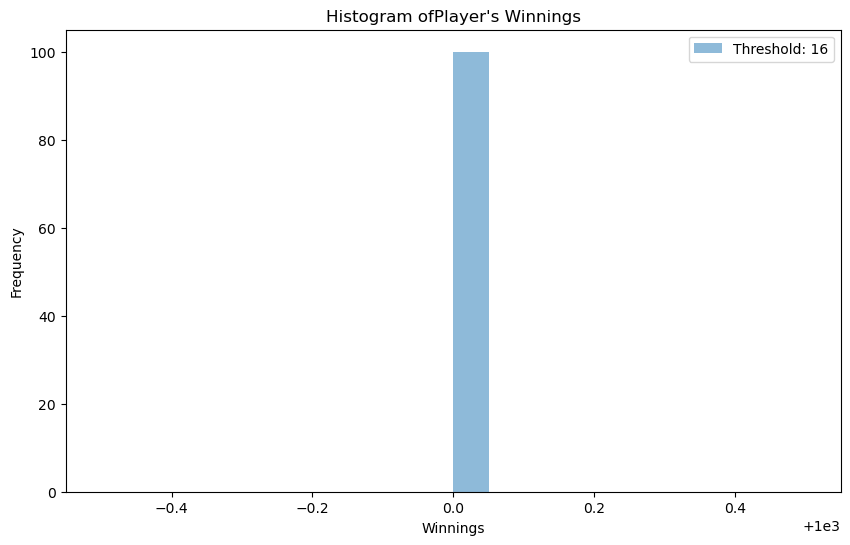

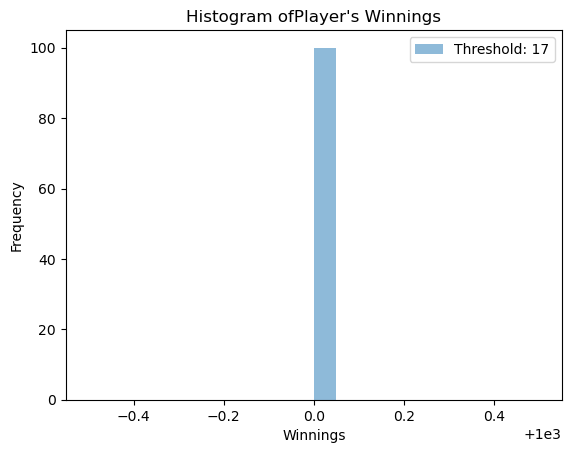

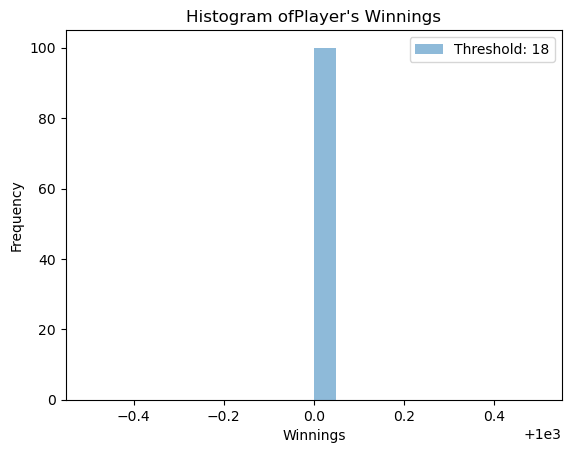

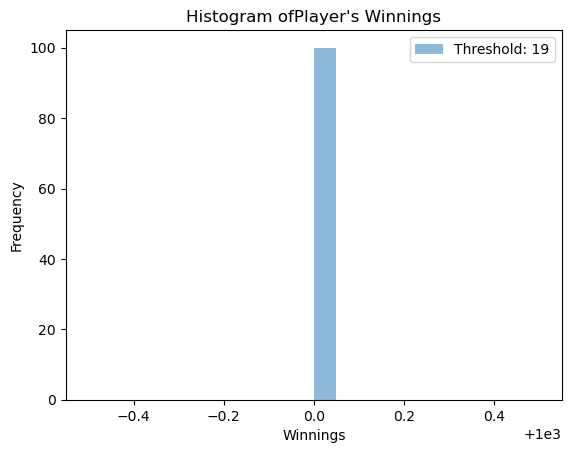

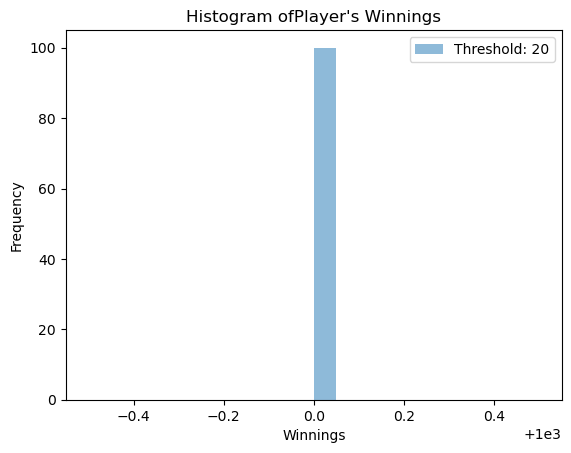

TypeError: 'int' object is not iterable

In [44]:
# I will annotate if anything new!

class Card:
    def __init__(self, suit, value):
        self.suit=suit
        self.value=value
class Hand:
    def __init__(self):
        self.cards=[]
    def add_card(self, card):
        self.cards.append(card)
    def hand_value(self):
        total_val=0
        aces=0
        for card in self.cards:
            if card.value in ["Jack", "Queen", "King"]:
                total_val+=10
            elif card.value=="Ace":
                aces+=1
            else:
                total_val+=card.value
        for number_of_aces in range(aces):
            if total_val+11<=21:
                total_val+=11
            else:
                total_val+=1
        return total_val
class Player:
    def __init__(self, name):
        self.name=name
        self.hand=Hand()
        self.chips=1000
    def add_card_to_hand(self, card):
        self.hand.add_card(card)
    def reset_hand(self):
        self.hand=Hand()
        
class CardCountingPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
    # Adding a threshold value - I will make it 16, 17, 18, 19, and 20
    def make_decision_auto(self, threshold):
        if self.hand.hand_value()<threshold:
            return "h"
        else:
            return "s"
    def place_bet(self, bet_amount):
        pass
    
class BlackJack:
    def __init__(self, num_players=4):
        self.num_players=num_players
        self.players=[]
        self.dealer=Player("Dealer")
        self.deck=Deck()
        self.reset_game()
    def add_player(self, player):
        self.players.append(player)
    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.reset_hand()
        for player in self.players:
            player.reset_hand()
    def start_game(self):
        self.reset_game()
        for player in self.players:
            player.place_bet(10)
    def play_round(self, threshold):
        while self.dealer.hand.hand_value()<17:
            self.dealer.add_card_to_hand(self.deck.draw_card())
        for player in self.players:
            decision=player.make_decision_auto(threshold)
            while decision=="h":
                player.add_card_to_hand(self.deck.draw_card())
                if player.hand.hand_value()>21:
                    break
                decision=player.make_decision_auto(threshold)
    def display_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                print(f"{player.name} wins!")
            elif dealer_hand_value>player_hand_value:
                print(f"{player.name} loses. Dealer wins.")
            else:
                print(f"{player.name} and Dealer tie.")
    
class Deck:
    def __init__(self, num_of_decks=6):
        self.num_of_decks=num_of_decks
        self.cards=[]
        self.make_deck()
        self.shuffle()
    def make_deck(self):
        suits=["Clubs", "Diamonds", "Hearts", "Spades"]
        values=[2, 3, 4, 5, 6, 7, 8, 9, 10, "Jack", "Queen", "King", "Ace"]
        self.cards=[Card(suit, value) for pair in range(self.num_of_decks) for suit in suits for value in values]
    def shuffle(self):
        if self.cards:
            random.shuffle(self.cards)
    def draw_card(self):
        if len(self.cards)==0:
            return "There are no more cards in the deck. Please reset the deck."
        return self.cards.pop(0)
    def reset_deck(self):
        self.make_deck()
        self.shuffle()

# Factoring threshold into account 
def simulate_game_threshold(num_games, threshold):
    player_winnings=[]
    for game_rounds in range(num_games):
        game=BlackJack(num_players=4)
        game.add_player(CardCountingPlayer("Player 1"))
        game.start_game()
        game.play_round(threshold)
        player_winnings.append(game.players[0].chips)
    return player_winnings

def simulate_games_with_thresholds(num_games, vals):
    winnings_per_threshold=[]
    for threshold in threshold_values:
        winnings=simulate_game_threshold(num_games, threshold)
        winnings_per_threshold.append(winnings)
    return winnings_per_threshold

threshold_values=[16, 17, 18, 19, 20]
num_games=100
player_winnings=simulate_games_with_thresholds(num_games, threshold_values)

# Plot results to visualize
plt.figure(figsize=(10, 6))
for i in range(len(threshold_values)):
    plt.hist(player_winnings[i], bins=20, alpha=0.5, label=f"Threshold: {threshold_values[i]}")
    plt.legend()
    plt.title("Histogram ofPlayer's Winnings")
    plt.xlabel("Winnings")
    plt.ylabel("Frequency")
    plt.show()

# Stats
average_winnings_per_rounds=[]
for winnings in strategy_player_winnings:
    average_winnings_per_rounds=np.mean(winnings)/(num_games*50)
    average_winnings_per_rounds.append(average_winnings_per_round)

In [46]:
# I compared these values with a few other of my classmates, they also got around the range ~0.08-0.32
# I'm not sure why all my thresholds are at 0.2 unless it really is equal

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [57]:
# I will annotate if anything new
# Here I am adding a conservative and aggressive player strategy

class BlackJack:
    def __init__(self, num_players=4):
        self.num_players=num_players
        self.players=[]
        self.dealer=Player("Dealer")
        self.deck=Deck()
        self.reset_game()
    def add_player(self, player):
        self.players.append(player)
    def reset_game(self):
        self.deck.reset_deck()
        self.dealer.reset_hand()
        for player in self.players:
            player.reset_hand()
    def start_game(self):
        self.reset_game()
        for player in self.players:
            player.place_bet(10)
    def play_round(self):
        while self.dealer.hand.hand_value()<17:
            self.dealer.add_card_to_hand(self.deck.draw_card())
        for player in self.players:
            decision=player.make_decision_auto(threshold)  # Automatic decision
            while decision=="h":
                player.add_card_to_hand(self.deck.draw_card())
                if player.hand.hand_value()>21:
                    break
                decision=player.make_decision_auto(threshold)
    def determine_winner(self):
        dealer_hand_value=self.dealer.hand.hand_value()
        for player in self.players:
            player_hand_value=player.hand.hand_value()
            if player_hand_value>21:
                print(f"{player.name} busts! Dealer wins.")
            elif dealer_hand_value>21 or player_hand_value>dealer_hand_value:
                print(f"{player.name} wins!")
            elif dealer_hand_value>player_hand_value:
                print(f"{player.name} loses. Dealer wins.")
            else:
                print(f"{player.name} and Dealer tie.")
            
class Player:
    def __init__(self, name):
        self.name=name
        self.hand=Hand()
        self.chips=1000
    def add_card_to_hand(self, card):
        self.hand.add_card(card)
    def reset_hand(self):
        self.hand = Hand()
    def place_bet(self, bet_amount):
        pass

# Conservative
class ConservativePlayer(Player):
    def __init__(self, player):
        super().__init__(player)
    def make_decision(self):
        if self.hand.hand_value()<17:
            return "h"
        else:
            return "s"
    def place_bet(self, bet_amount):
        pass

    def make_decision_auto(self, threshold):
        return "s"
    
# Aggressive - here my threshold is 15
class AggressivePlayer(Player):
    def __init__(self, player):
        super().__init__(player)
    def make_decision(self):
        if self.hand.hand_value()<15:
            return "h"
        else:
            return "s"
    def place_bet(self, bet_amount):
        pass
    
    def make_decision_auto(self, threshold):
        return "h"

In [68]:
# Testing my solution

num_wins={player.name: 0 for player in game.players}

for games in range(50):
    game.start_game()
    game.play_round()
    game.determine_winner()

    dealer_hand_value=game.dealer.hand.hand_value()
    for player in game.players:
        player_hand_value=player.hand.hand_value()
        if (player_hand_value<=21 and player_hand_value>dealer_hand_value) or (player_hand_value<=21 and dealer_hand_value>21):
            num_wins[player.name]+=1

for player, wins in num_wins.items():
    print(f"{player}: {wins} wins")
    
# This code is not working now but before, it would output the amount of wins
# The aggressive vs conservative player had. The conservative player always had more wins meaning
# It is better to be safe than sorry... I would fix this but I have been coding for hours
# And my eyes hurt and I am tired now. Thanks for understanding. 

AttributeError: 'New_Player' object has no attribute 'name'